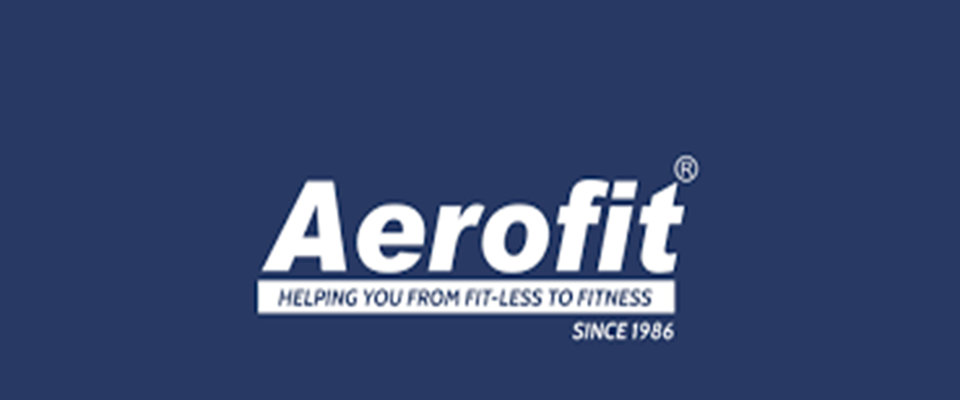

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("aerofit_treadmill.txt")

In [ ]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df["Product"].nunique()

3

In [ ]:
df.groupby("Product")["Income"].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

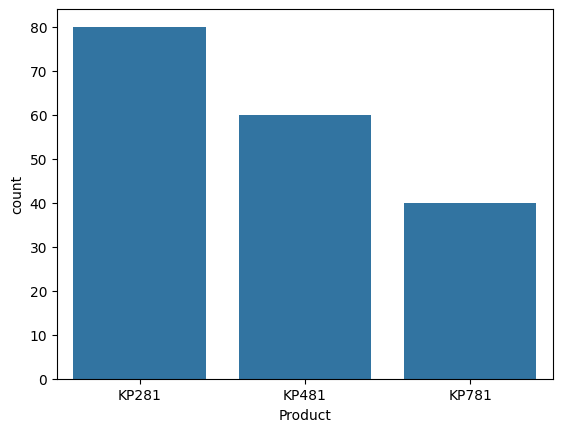

In [ ]:
sns.countplot(data = df , x = "Product")
plt.show()

In [ ]:
grouped_df = df.groupby("Product").agg(
    mean_age = ("Age" , "mean"),
    mean_education = ("Education" , "mean"),
    mean_fitness = ("Fitness" , "mean"),
    mean_income = ("Income" , "mean")
).reset_index()

In [ ]:
grouped_df

,Product,mean_age,mean_education,mean_fitness,mean_income
0,KP281,28.55,15.037500,2.9625,46418.025
1,KP481,28.90,15.116667,2.9000,48973.650
2,KP781,29.10,17.325000,4.6250,75441.575


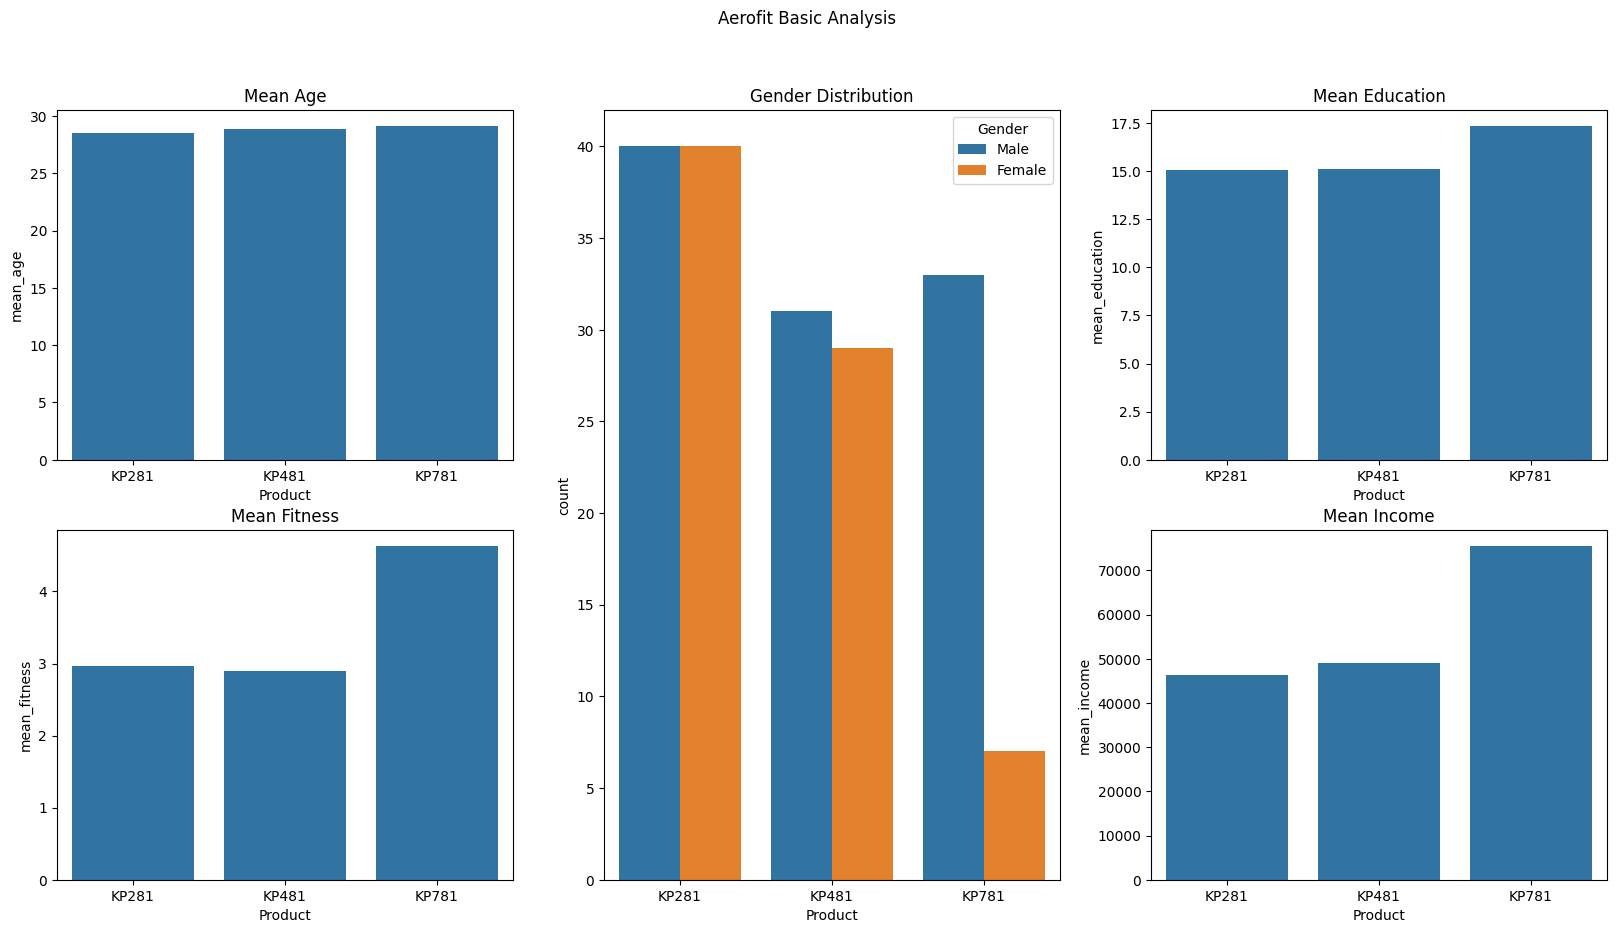

In [ ]:
plt.figure(figsize = (20, 10)).suptitle("Aerofit Basic Analysis")

plt.subplot(2, 3, 1)
sns.barplot(data = grouped_df , x = "Product" , y = "mean_age")
plt.title("Mean Age")

plt.subplot(2, 3, 3)
sns.barplot(data = grouped_df , x = "Product" , y = "mean_education")
plt.title("Mean Education")

plt.subplot(2, 3, 4)
sns.barplot(data = grouped_df , x = "Product" , y = "mean_fitness")
plt.title("Mean Fitness")

plt.subplot(2, 3, 6)
sns.barplot(data = grouped_df , x = "Product" , y = "mean_income")
plt.title("Mean Income")

plt.subplot(1, 3, 2)
sns.countplot(data = df , x = "Product" , hue = "Gender")
plt.title("Gender Distribution")

plt.show()

<Axes: xlabel='Product', ylabel='mean_age'>

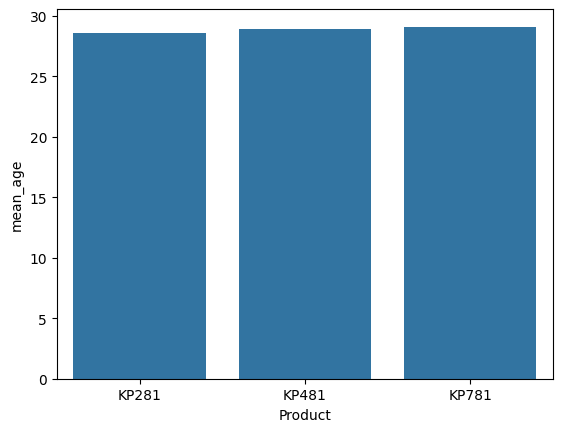

In [ ]:
sns.barplot(data = grouped_df , x = "Product" , y = "mean_age")

In [ ]:
age_crosstab = pd.crosstab(index = df["Product"] , columns = df["Gender"])

In [ ]:
age_crosstab

Gender,Female,Male
Product,,
KP281,40,40
KP481,29,31
KP781,7,33


1

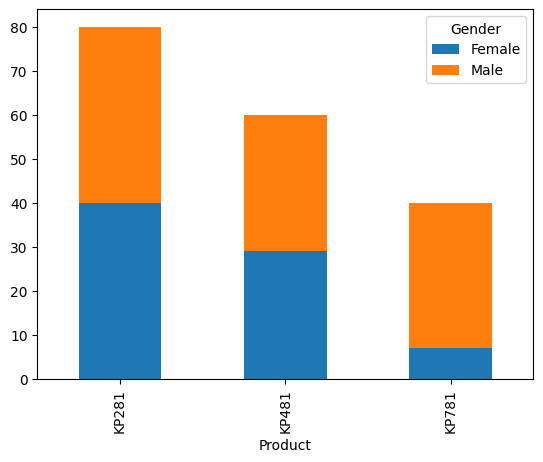

In [ ]:
# prompt: Using dataframe age_crosstab: barplot

age_crosstab.plot(kind = "bar" , stacked = True)
1

<Axes: xlabel='Product', ylabel='Age'>

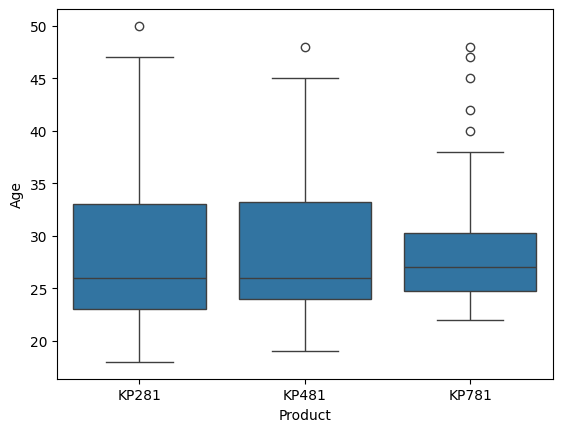

In [ ]:
sns.boxplot(data = df , y = "Age" , x = "Product")

<Axes: xlabel='Education', ylabel='count'>

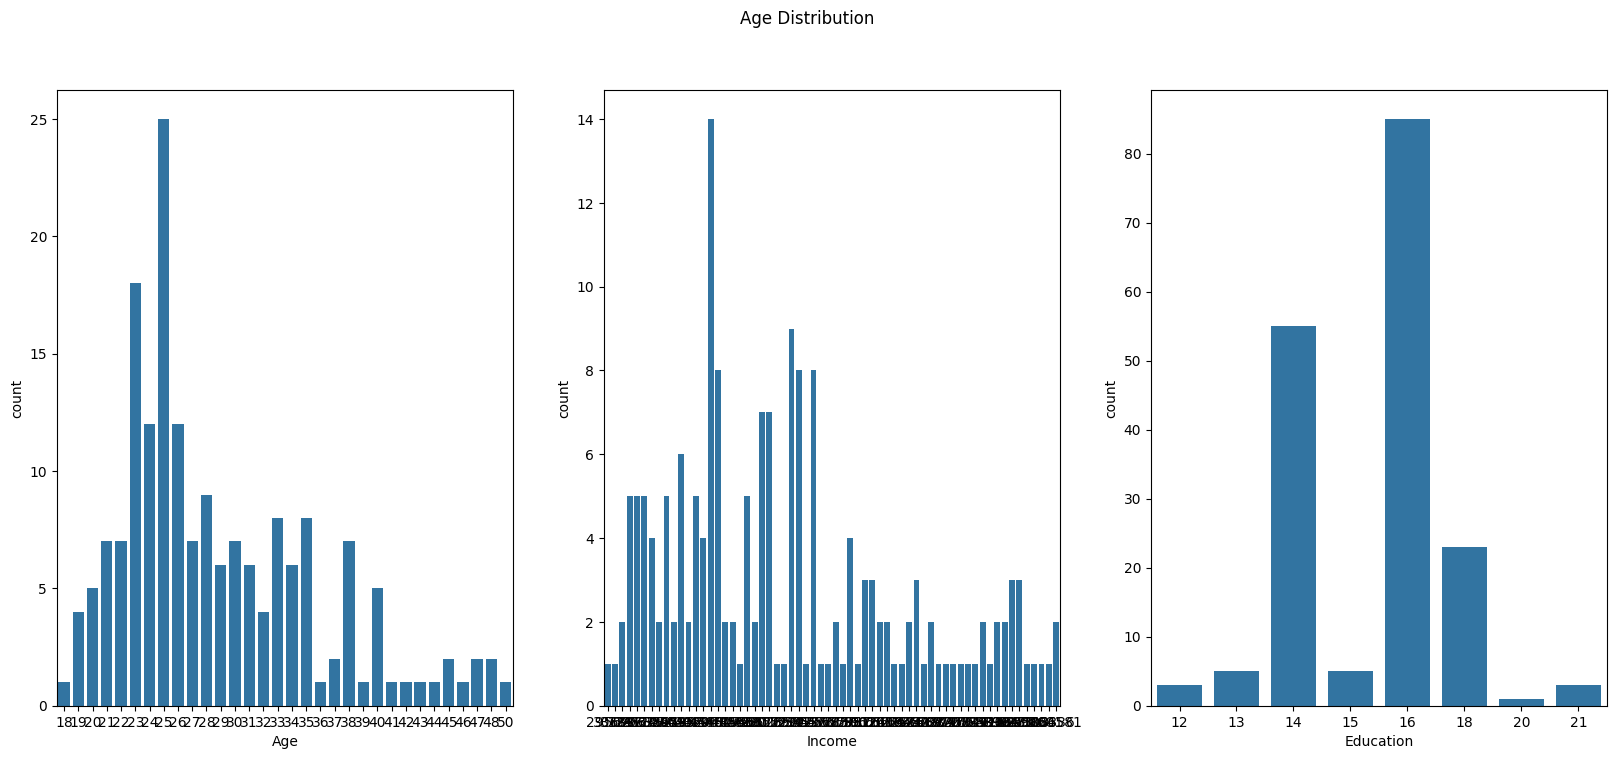

In [ ]:
plt.figure(figsize = (20, 8)).suptitle("Age Distribution")


plt.subplot(1,3,1)
sns.countplot(data = df , x = "Age")

plt.subplot(1,3,2)
sns.countplot(data = df , x = "Income")

plt.subplot(1,3,3)
sns.countplot(data = df , x = "Education")


Pie Chart for sale of different product caterogy


In [ ]:
piechart = df["Product"].value_counts()

In [ ]:
piechart

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

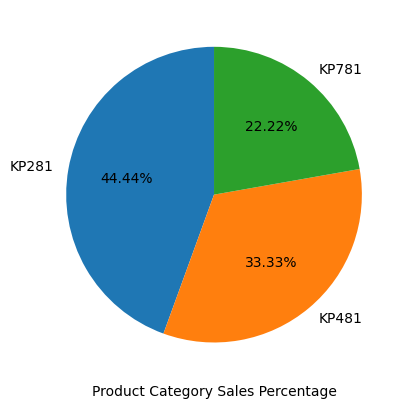

In [ ]:
plt.pie(piechart , labels = piechart.index , autopct = "%.2f%%" , startangle = 90)
plt.xlabel("Product Category Sales Percentage")
plt.show()

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df["Fitness"].agg(["min" , "max"])

min    1
max    5
Name: Fitness, dtype: int64

In [ ]:
mar = df["MaritalStatus"].value_counts()

In [ ]:
gender = df["Gender"].value_counts()

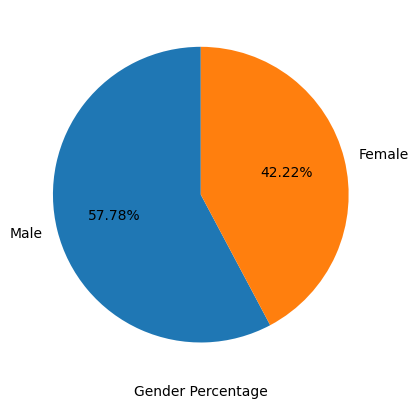

In [ ]:
plt.pie(gender , labels = gender.index , autopct = "%.2f%%" , startangle = 90)
plt.xlabel("Gender Percentage")
plt.show()

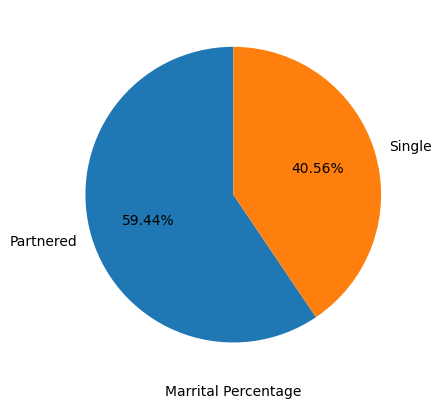

In [ ]:
plt.pie(mar , labels = mar.index , autopct = "%.2f%%" , startangle = 90)
plt.xlabel("Marrital Percentage")
plt.show()

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<Axes: xlabel='Age', ylabel='Probability'>

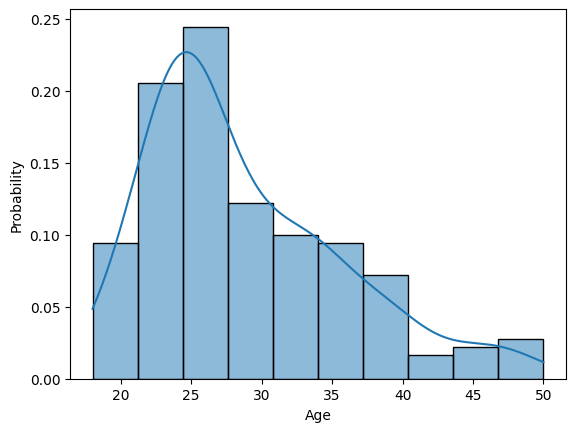

In [ ]:
sns.histplot(df["Age"] ,bins = 10 , stat = "probability" , kde = True)

In [ ]:
df1 = df[["Age" , "Education" , "Fitness" , "Income"]]

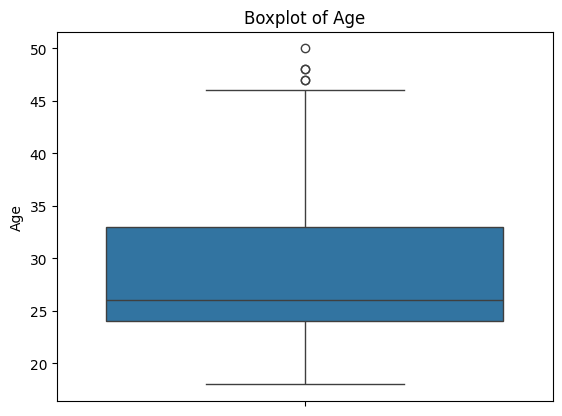

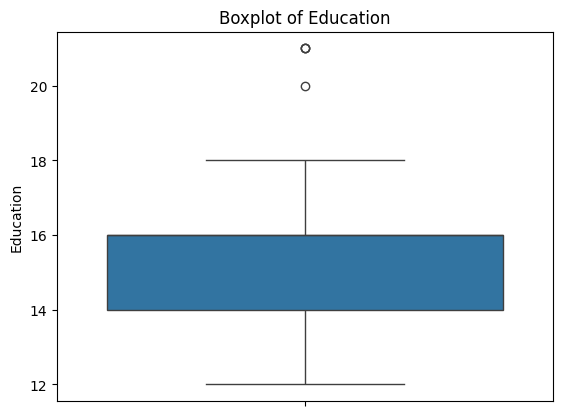

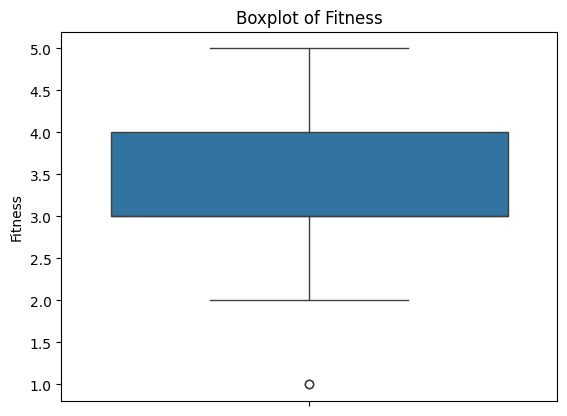

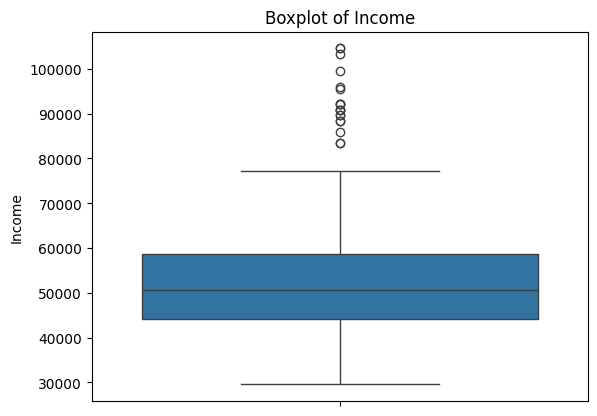

In [ ]:
for col in df1.columns:
    plt.figure()  # Create a new figure for each plot
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
    plt.show()

Text(0.5, 0, 'Mean of Income: 53719.58 Median of Income : 50596.5')

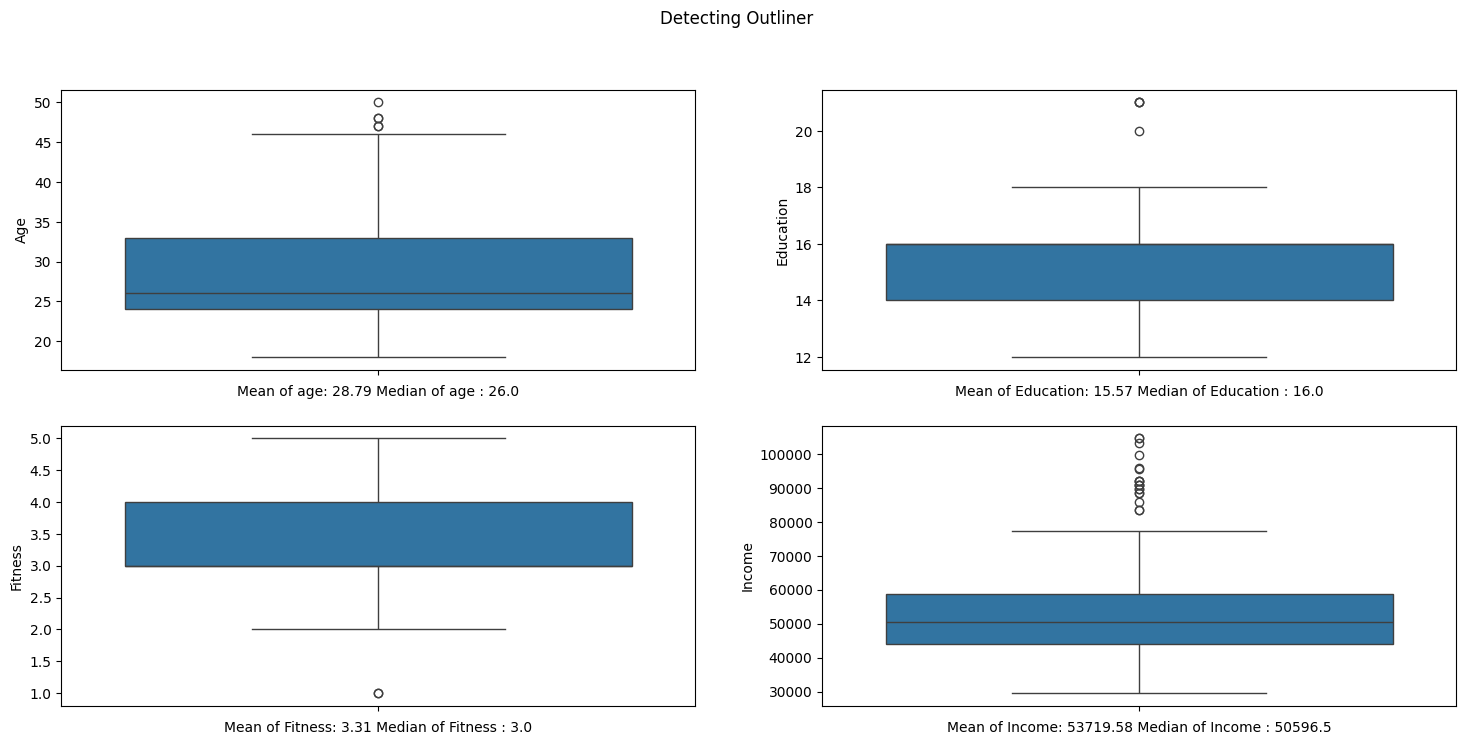

In [ ]:
plt.figure(figsize = (18,8)).suptitle("Detecting Outliner")

plt.subplot(2,2,1)
sns.boxplot(data = df["Age"])
plt.xlabel(f"Mean of age: {df['Age'].mean():.2f} Median of age : {df['Age'].median()}")

plt.subplot(2,2,2)
sns.boxplot(data = df["Education"])
plt.xlabel(f"Mean of Education: {df['Education'].mean():.2f} Median of Education : {df['Education'].median()}")

plt.subplot(2,2,3)
sns.boxplot(data = df["Fitness"])
plt.xlabel(f"Mean of Fitness: {df['Fitness'].mean():.2f} Median of Fitness : {df['Fitness'].median()}")

plt.subplot(2,2,4)
sns.boxplot(data = df["Income"])
plt.xlabel(f"Mean of Income: {df['Income'].mean():.2f} Median of Income : {df['Income'].median()}")



Mean --> 28.79
Std. Devaition --> 6.94


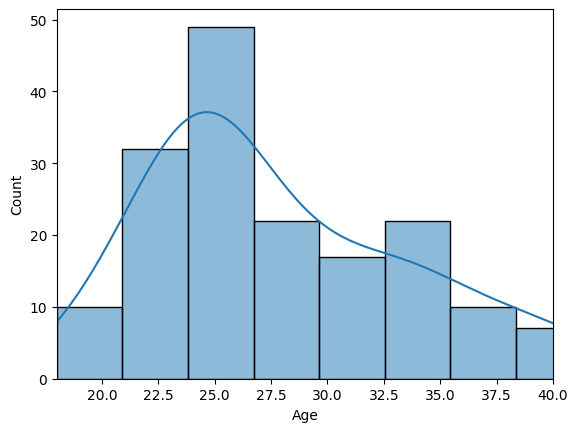

In [ ]:
sns.histplot(df["Age"] , kde = True)
plt.xlim(18,40)

mu = df["Age"].mean()
std = df["Age"].std()

print(f"Mean --> {mu:.2f}\nStd. Devaition --> {std:.2f}")

<Axes: xlabel='Age', ylabel='Count'>

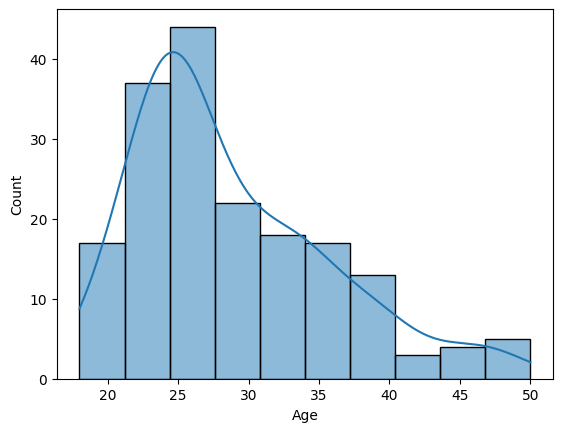

In [ ]:
sns.histplot(df["Age"] , bins = 10 , kde = True)




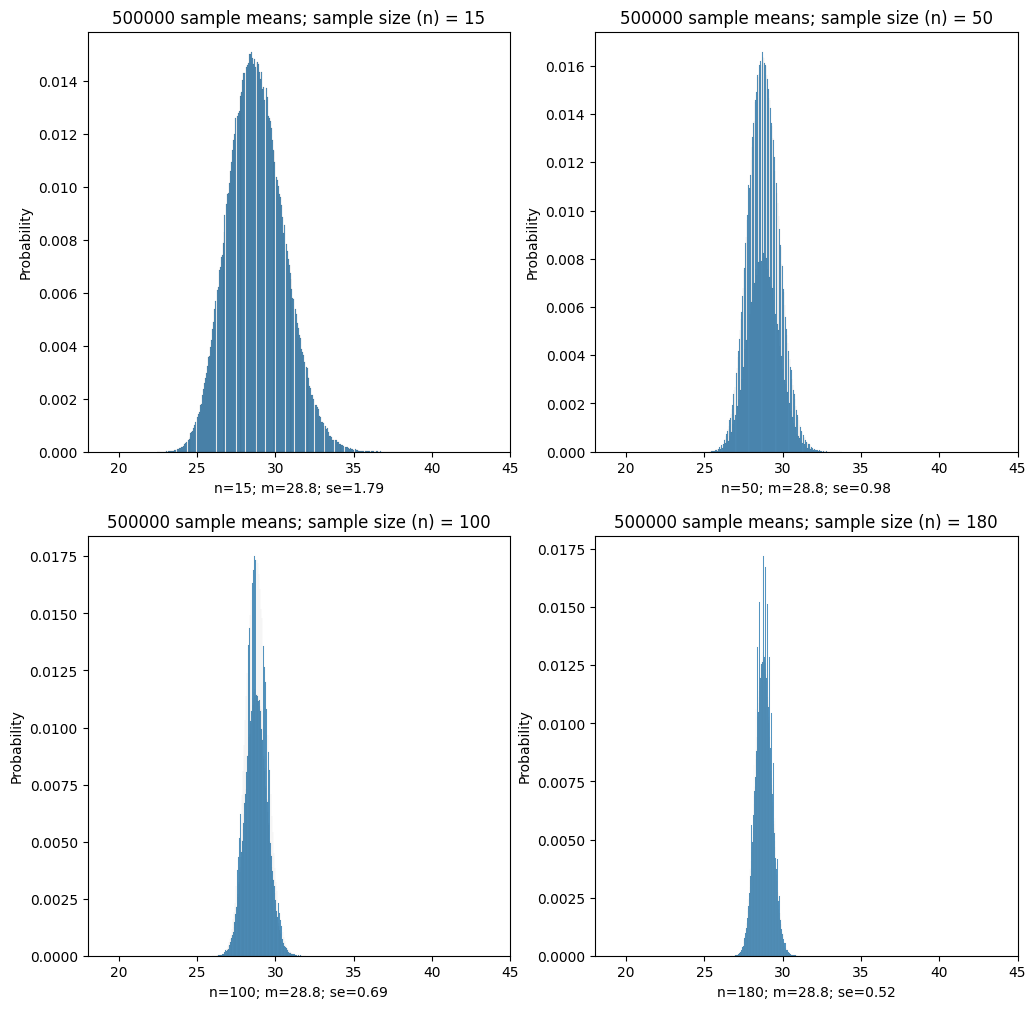

In [ ]:
no_of_samples = 500000

pop_data = df['Age']

plt.figure(figsize=(12,12))
subplot_no = 1
for n in [15, 50, 100 , 180]:
  new_sample = np.random.choice(a=pop_data, size=(no_of_samples,n)) #(rows,cols)
  sample_means = new_sample.mean(axis=1)

  plt.subplot(2,2,subplot_no)
  plt.title(f"{no_of_samples} sample means; sample size (n) = {n}")
  plt.xlim(18,45)
  #plt.xlabel(f"'Mean' of sample means={sample_means.mean():.1f}")
  plt.xlabel(f"n={n}; m={sample_means.mean():.1f}; se={sample_means.std():.2f}")
  sns.histplot(x=sample_means, stat="probability")

  subplot_no += 1

In [ ]:
df_1 = df[df["Product"] == "KP281"]

<Figure size 1000x500 with 0 Axes>

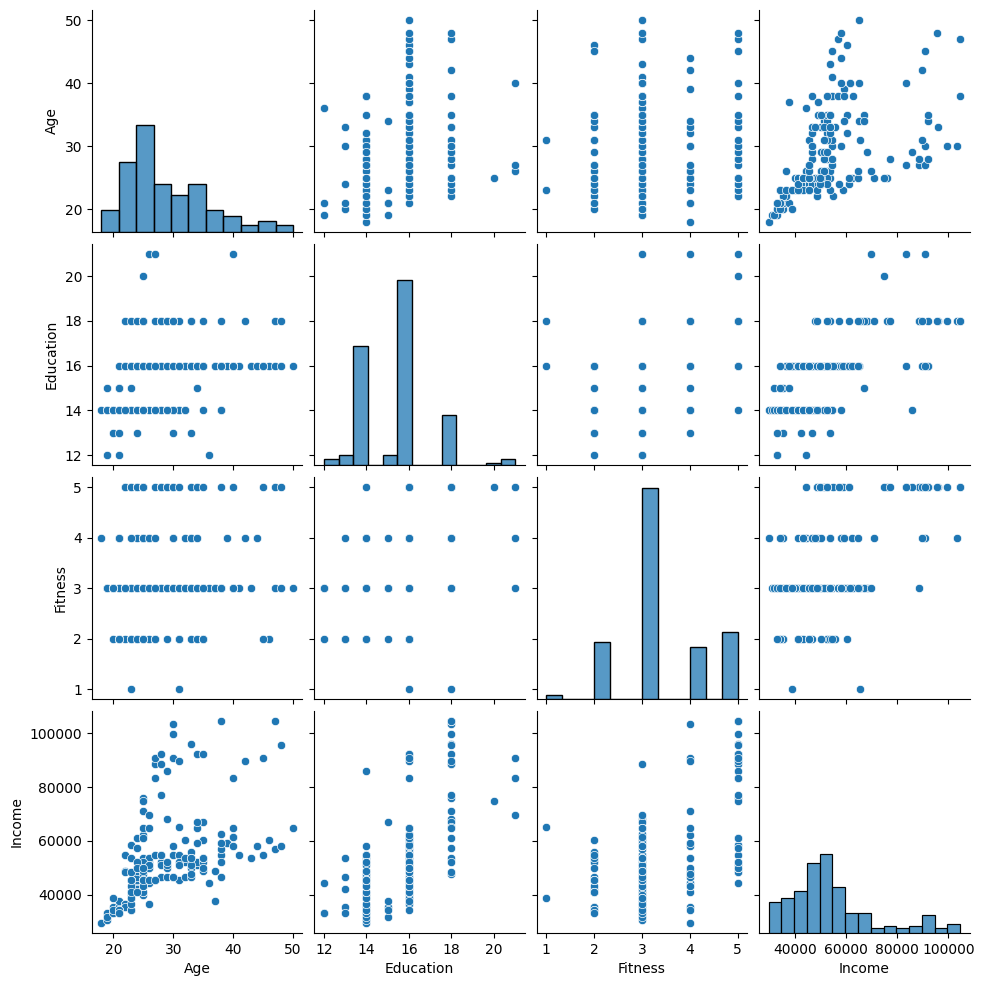

In [ ]:
plt.figure(figsize = (10,5))
sns.pairplot(data = df1)

<Axes: xlabel='Income', ylabel='Age'>

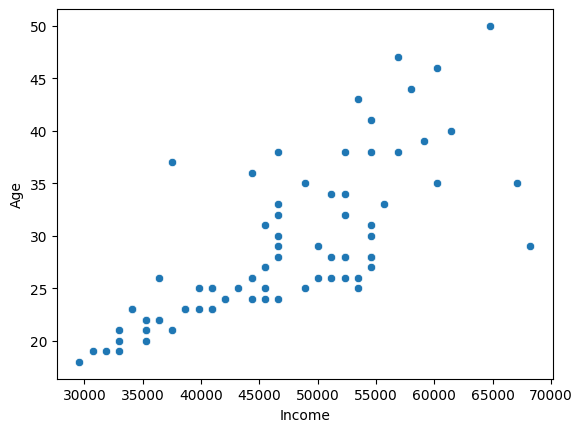

In [ ]:
sns.scatterplot(data = df_1 , x = df_1["Income"] , y = df_1["Age"])

In [ ]:
len(df)

180

In [ ]:
mu = df_1["Age"].mean()
inc = df_1["Income"].mean()

M = (df_1[df_1["Gender"] == "Male"]["Gender"].count()/180)*100     #percentage of male buying KP281
m_a = df_1[(df_1["Gender"] == "Male") & (df_1["Age"] > mu)]["Gender"].count()/len(df)*100 #percentage of buyer that are male above mean age
m_a_i = df_1[(df_1["Gender"] == "Male") & (df_1["Age"] > mu) & (df_1["Income"] > inc)]["Gender"].count()/len(df)*100 #percentage of buyer that are male above mean age and above mean salary
A = (df_1[df_1["Age"] > mu]["Age"].count()/len(df))*100 #percentage of buyer above 28 year.

print(f"percentage of male buying KP281 ---> {M:.2f}")
print(f"percentage of buyer that are male above mean age ---> {m_a:.2f}")
print(f"percentage of buyer that are male above mean age and above mean salary ---> {m_a_i:.2f}")
print(f"percentage of buyer above 28 year ---> {A:.2f}")

percentage of male buying KP281 ---> 22.22
percentage of buyer that are male above mean age ---> 8.89
percentage of buyer that are male above mean age and above mean salary ---> 8.33
percentage of buyer above 28 year ---> 16.67


In [ ]:
df_1[(df_1["Gender"] == "male") & (df_1["Age"] > mu)]["Gender"].count()

0

In [ ]:
male = df_1[df["Gender"] == "Male"]

<ipython-input-48-454167ca03ca>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male = df_1[df["Gender"] == "Male"]


In [ ]:
male["Age"].value_counts()

Age
23    5
26    4
25    3
38    3
30    2
21    2
24    2
28    2
19    2
35    1
43    1
41    1
40    1
39    1
36    1
18    1
34    1
32    1
31    1
29    1
27    1
22    1
20    1
47    1
Name: count, dtype: int64

Mean --> 28.65
Std. Devaition --> 7.42


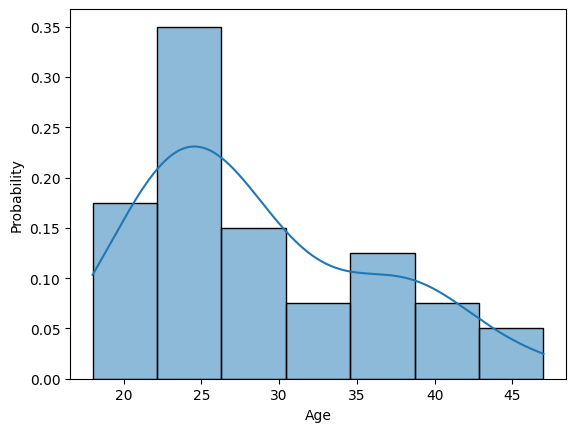

In [ ]:
sns.histplot(data =male , x = "Age" , stat="probability" , kde = True)

mu = male["Age"].mean()
std = male["Age"].std()

print(f"Mean --> {mu:.2f}\nStd. Devaition --> {std:.2f}")

In [ ]:
male["Age"].mode()

0    23
Name: Age, dtype: int64

In [ ]:
male[(male["Age"] <= 27) &(male["Income"]>47000)].shape

(4, 9)

Income

Mean --> 46815.97
Std. Devaition --> 9022.41
Median --> 46617.00


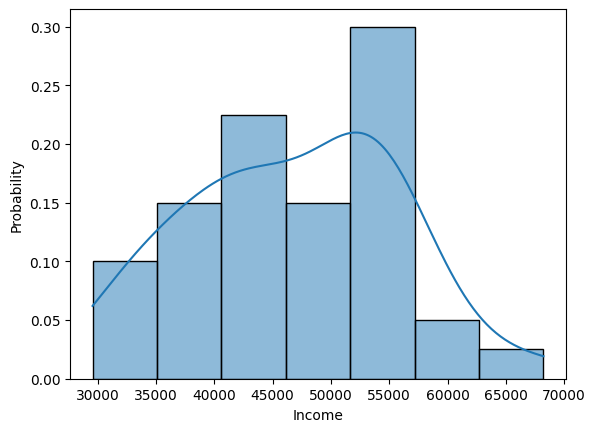

In [ ]:
sns.histplot(data =male , x = "Income" , stat="probability" , kde = True)

mu = male["Income"].mean()
me = male["Income"].median()
std = male["Income"].std()

print(f"Mean --> {mu:.2f}\nStd. Devaition --> {std:.2f}\nMedian --> {me:.2f}")

**For KP281**




Male Caculation

In [ ]:
male = df_1[df_1["Gender"] == "Male"]["Gender"].count()
m_ag = df_1[(df_1["Gender"] == "Male") & (df_1["Age"]>27)]["Gender"].count()
m_al = df_1[(df_1["Gender"] == "Male") & (df_1["Age"]<=27)]["Gender"].count()
m_al_ig = df_1[(df_1["Gender"] == "Male") & (df_1["Age"]<=27) & (df_1["Income"] > 47000)]["Gender"].count()
m_al_il = df_1[(df_1["Gender"] == "Male") & (df_1["Age"]<=27) & (df_1["Income"] <= 47000)]["Gender"].count()

print(f"percentage of male : {male/len(df_1)*100:.2f}")
print(f"percentage of male above 27 : {(m_ag/male)*100:.2f}")
print(f"percentage of male below 27 : {(m_al/male)*100:.2f}")
print(f"percentage of male below 27 and income above 47000 : {(m_al_ig/m_al)*100:.2f}")
print(f"percentage of male below 27 and income below 47000 : {(m_al_il/m_al)*100:.2f}")

percentage of male : 50.00
percentage of male above 27 : 45.00
percentage of male below 27 : 55.00
percentage of male below 27 and income above 47000 : 18.18
percentage of male below 27 and income below 47000 : 81.82


Female calulation

In [ ]:
male = df_1[df_1["Gender"] == "Female"]["Gender"].count()
m_ag = df_1[(df_1["Gender"] == "Female") & (df_1["Age"]>27)]["Gender"].count()
m_al = df_1[(df_1["Gender"] == "Female") & (df_1["Age"]<=27)]["Gender"].count()
m_al_ig = df_1[(df_1["Gender"] == "Female") & (df_1["Age"]<=27) & (df_1["Income"] > 47000)]["Gender"].count()
m_al_il = df_1[(df_1["Gender"] == "Female") & (df_1["Age"]<=27) & (df_1["Income"] <= 47000)]["Gender"].count()

print(f"percentage of Female : {male/len(df_1)*100:.2f}")
print(f"percentage of Female above 27 : {(m_ag/male)*100:.2f}")
print(f"percentage of Female below 27 : {(m_al/male)*100:.2f}")
print(f"percentage of Female below 27 and above 47000 : {(m_al_ig/m_al)*100:.2f}")
print(f"percentage of Female below 27 and below 47000 : {(m_al_il/m_al)*100:.2f}")

percentage of Female : 50.00
percentage of Female above 27 : 45.00
percentage of Female below 27 : 55.00
percentage of Female below 27 and above 47000 : 13.64
percentage of Female below 27 and below 47000 : 86.36


 **For** **KP481**

In [ ]:
df_2 = df[df["Product"] == "KP481"]

Male calulation

In [ ]:
male = df_2[df_2["Gender"] == "Male"]["Gender"].count()
m_ag = df_2[(df_2["Gender"] == "Male") & (df_2["Age"]>27)]["Gender"].count()
m_al = df_2[(df_2["Gender"] == "Male") & (df_2["Age"]<=27)]["Gender"].count()
m_al_ig = df_2[(df_2["Gender"] == "Male") & (df_2["Age"]<=27) & (df_2["Income"] > 47000)]["Gender"].count()
m_al_il = df_2[(df_2["Gender"] == "Male") & (df_2["Age"]<=27) & (df_2["Income"] <= 47000)]["Gender"].count()

print(f"percentage of male : {male/len(df_2)*100:.2f}")
print(f"percentage of male above 27 yr. : {(m_ag/male)*100:.2f}")
print(f"percentage of male below 27 yr. : {(m_al/male)*100:.2f}")
print(f"percentage of male below 27 yr. and above $47000 : {(m_al_ig/m_al)*100:.2f}")
print(f"percentage of male below 27 yr. and below $47000 : {(m_al_il/m_al)*100:.2f}")

percentage of male : 51.67
percentage of male above 27 yr. : 41.94
percentage of male below 27 yr. : 58.06
percentage of male below 27 yr. and above $47000 : 27.78
percentage of male below 27 yr. and below $47000 : 72.22


Female

In [ ]:
male = df_2[df_2["Gender"] == "Female"]["Gender"].count()
m_ag = df_2[(df_2["Gender"] == "Female") & (df_2["Age"]>27)]["Gender"].count()
m_al = df_2[(df_2["Gender"] == "Female") & (df_2["Age"]<=27)]["Gender"].count()
m_al_ig = df_2[(df_2["Gender"] == "Female") & (df_2["Age"]<=27) & (df_2["Income"] > 47000)]["Gender"].count()
m_al_il = df_2[(df_2["Gender"] == "Female") & (df_2["Age"]<=27) & (df_2["Income"] <= 47000)]["Gender"].count()

print(f"percentage of Female : {male/len(df_2)*100:.2f}")
print(f"percentage of Female above 27 yr. : {(m_ag/male)*100:.2f}")
print(f"percentage of Female below 27 yr.: {(m_al/male)*100:.2f}")
print(f"percentage of Female below 27 yr. and above $47000 : {(m_al_ig/m_al)*100:.2f}")
print(f"percentage of Female below 27 yr. and below $47000 : {(m_al_il/m_al)*100:.2f}")

percentage of Female : 48.33
percentage of Female above 27 yr. : 51.72
percentage of Female below 27 yr.: 48.28
percentage of Female below 27 yr. and above $47000 : 21.43
percentage of Female below 27 yr. and below $47000 : 78.57


**for** **KP781**

In [ ]:
df_3 = df[df["Product"] == "KP781"]

Male Calculation

In [ ]:
male = df_3[df_3["Gender"] == "Male"]["Gender"].count()
m_ag = df_3[(df_3["Gender"] == "Male") & (df_3["Age"]>27)]["Gender"].count()
m_al = df_3[(df_3["Gender"] == "Male") & (df_3["Age"]<=27)]["Gender"].count()
m_al_ig = df_3[(df_3["Gender"] == "Male") & (df_3["Age"]<=27) & (df_3["Income"] > 47000)]["Gender"].count()
m_al_il = df_3[(df_3["Gender"] == "Male") & (df_3["Age"]<=27) & (df_3["Income"] <= 47000)]["Gender"].count()

print(f"percentage of male : {male/len(df_3)*100:.2f}")
print(f"percentage of male above 27 : {(m_ag/male)*100:.2f}")
print(f"percentage of male below 27 : {(m_al/male)*100:.2f}")
print(f"percentage of male below 27 and above 47000 : {(m_al_ig/m_al)*100:.2f}")
print(f"percentage of male below 27 and below 47000 : {(m_al_il/m_al)*100:.2f}")

percentage of male : 82.50
percentage of male above 27 : 45.45
percentage of male below 27 : 54.55
percentage of male below 27 and above 47000 : 100.00
percentage of male below 27 and below 47000 : 0.00


In [ ]:
male = df_3[df_3["Gender"] == "Female"]["Gender"].count()
m_ag = df_3[(df_3["Gender"] == "Female") & (df_3["Age"]>27)]["Gender"].count()
m_al = df_3[(df_3["Gender"] == "Female") & (df_3["Age"]<=27)]["Gender"].count()
m_al_ig = df_3[(df_3["Gender"] == "Female") & (df_3["Age"]<=27) & (df_3["Income"] > 47000)]["Gender"].count()
m_al_il = df_3[(df_3["Gender"] == "Female") & (df_3["Age"]<=27) & (df_3["Income"] <= 47000)]["Gender"].count()

print(f"percentage of Female : {male/len(df_3)*100:.2f}")
print(f"percentage of Female above 27 : {(m_ag/male)*100:.2f}")
print(f"percentage of Female below 27 : {(m_al/male)*100:.2f}")
print(f"percentage of Female below 27 and above 47000 : {(m_al_ig/m_al)*100:.2f}")
print(f"percentage of Female below 27 and below 47000 : {(m_al_il/m_al)*100:.2f}")

percentage of Female : 17.50
percentage of Female above 27 : 42.86
percentage of Female below 27 : 57.14
percentage of Female below 27 and above 47000 : 100.00
percentage of Female below 27 and below 47000 : 0.00


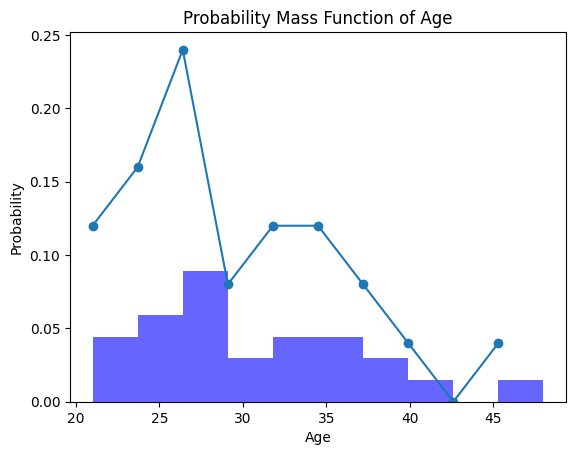

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Sample Data (Use your actual data here)
ages = [21, 22, 23, 24, 25, 25, 26, 27, 27, 28, 28, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 48]

# Convert to DataFrame
df1 = pd.DataFrame(ages, columns=['Age'])

# Plot Histogram
count, bins, ignored = plt.hist(df1['Age'], bins=10, density=True, alpha=0.6, color='b')

# Normalize to create PMF
pmf = count / sum(count)

# Plot PMF
plt.plot(bins[:-1], pmf, marker='o')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Probability Mass Function of Age')
plt.show()


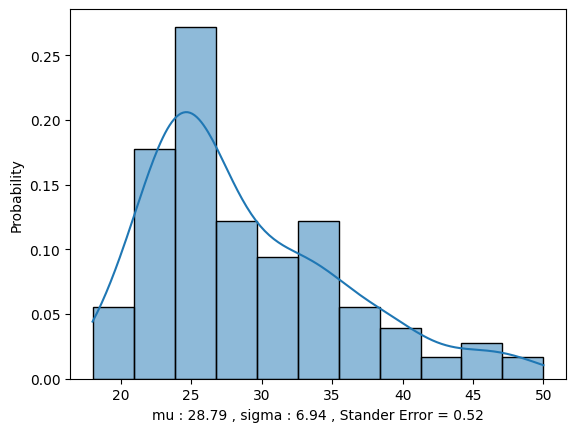

In [ ]:
mu = df["Age"].mean()
std = df["Age"].std()
SE = std/np.sqrt(len(df))

sns.histplot(df , x = "Age" , stat = "probability" , kde = True)
plt.xlabel(f"mu : {mu:.2f} , sigma : {std:.2f} , Stander Error = {SE:.2f}")
plt.ylabel("Probability")
plt.show()



In [ ]:
from scipy.stats import norm
from scipy.stats import binom

In [ ]:
mu = 28.8
SE = 0.52

z = norm.cdf(0.95)

age = mu + (z*SE)
age

29.23105081431959

In [ ]:
age1 = mu - (2*SE)
age2 = mu + (2+SE)

In [ ]:
print(age1 , age2)

27.76 31.32


In [ ]:
mu = 28.8
SE = 0.52
x = 29

z = (x-mu)/SE

norm.cdf(z)

0.6497388029480752

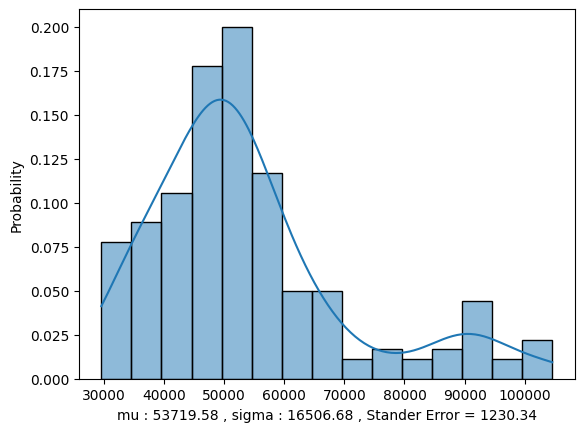

In [ ]:
mu = df["Income"].mean()
std = df["Income"].std()
SE = std/np.sqrt(len(df))

sns.histplot(df , x = "Income" , stat = "probability" , kde = True)
plt.xlabel(f"mu : {mu:.2f} , sigma : {std:.2f} , Stander Error = {SE:.2f}")
plt.ylabel("Probability")
plt.show()

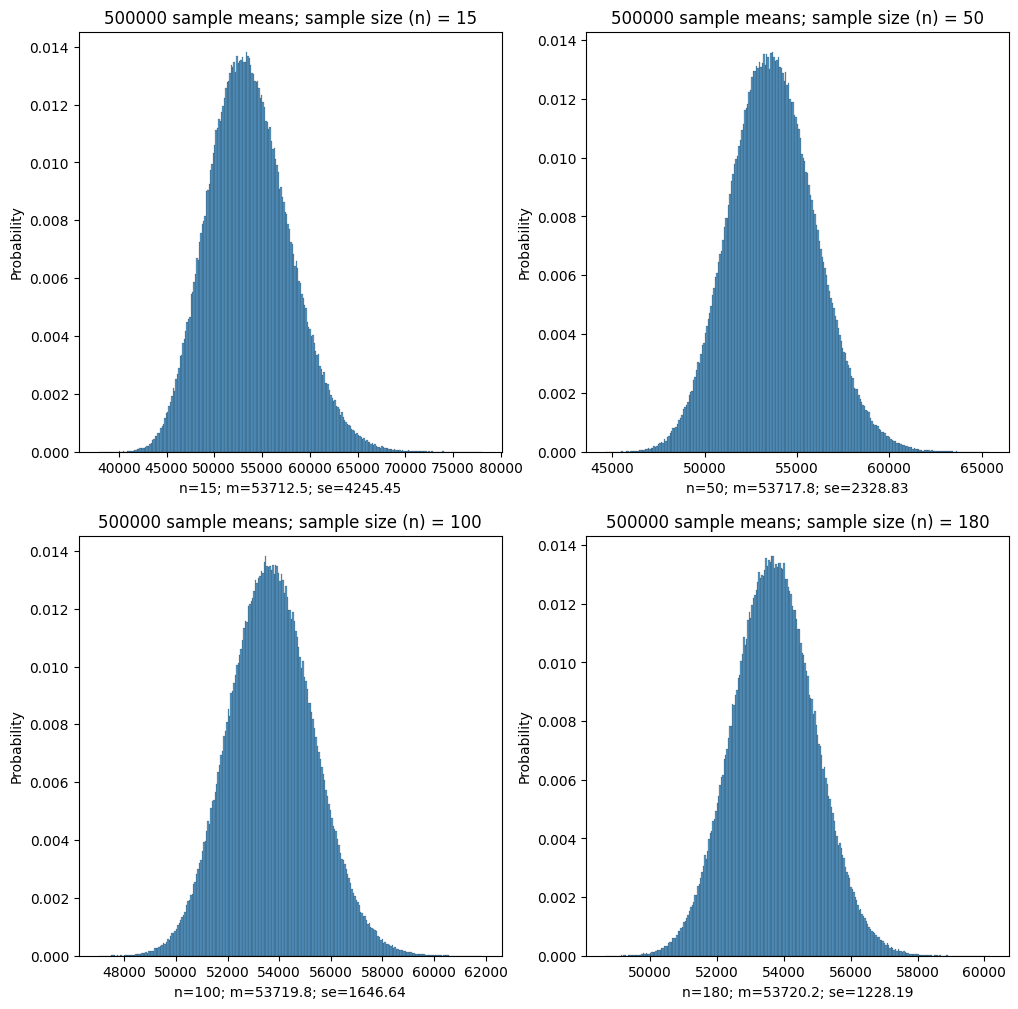

In [ ]:
no_of_samples = 500000

pop_data = df['Income']

plt.figure(figsize=(12,12))
subplot_no = 1
for n in [15, 50, 100 , 180]:
  new_sample = np.random.choice(a=pop_data, size=(no_of_samples,n)) #(rows,cols)
  sample_means = new_sample.mean(axis=1)

  plt.subplot(2,2,subplot_no)
  plt.title(f"{no_of_samples} sample means; sample size (n) = {n}")
  #plt.xlabel(f"'Mean' of sample means={sample_means.mean():.1f}")
  plt.xlabel(f"n={n}; m={sample_means.mean():.1f}; se={sample_means.std():.2f}")
  sns.histplot(x=sample_means, stat="probability")

  subplot_no += 1

In [ ]:
mu = 53719
SE = 1230

z = norm.cdf(0.95)

Income = mu + (z*SE)
Income

54738.600964640566

In [ ]:
Income1 = mu - (2*SE)
Income2 = mu + (2+SE)

In [ ]:
print(Income1 , Income2)

51259 54951


In [ ]:
mu = 53719
SE = 1230
x = 52500

z = (x-mu)/SE

norm.cdf(z)

0.16082889590124477